<a href="https://colab.research.google.com/github/bhakti242002/SML-Project/blob/main/SML_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar100
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Loading cifar-100 datset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
#Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [6]:
# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))  # (50000, 3072)
x_test_flat = x_test.reshape((x_test.shape[0], -1))     # (10000, 3072)

y_train = y_train.ravel()  # Flatten labels to (50000,)
y_test = y_test.ravel()    # Flatten labels to (10000,)



In [7]:
# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=100, verbose=1)
lr_model.fit(x_train_flat, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(verbose=1)

In [8]:
# Predict on test data
y_pred_lr = lr_model.predict(x_test_flat)

# Compute accuracy
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")


Logistic Regression Test Accuracy: 0.1798


In [9]:
# Apply PCA to reduce dimensions for logistic regression
pca = PCA(n_components=100)  # Reduce dimensionality
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

lr_pca_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_pca_model.fit(x_train_pca, y_train.ravel())
lr_pca_predictions = lr_pca_model.predict(x_test_pca)
lr_pca_accuracy = accuracy_score(y_test, lr_pca_predictions)
print(f"Logistic Regression with PCA Test Accuracy: {lr_pca_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression with PCA Test Accuracy: 0.1866


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.0250 - loss: 4.7776 - val_accuracy: 0.0614 - val_loss: 4.1799
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.0434 - loss: 4.2709 - val_accuracy: 0.0786 - val_loss: 3.9956
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.0613 - loss: 4.1617 - val_accuracy: 0.1010 - val_loss: 3.9566
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.0666 - loss: 4.0753 - val_accuracy: 0.1230 - val_loss: 3.7029
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.0795 - loss: 3.9906 - val_accuracy: 0.1334 - val_loss: 3.6468
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.0943 - loss: 3.8995 - val_accuracy: 0.1648 - val_loss: 3.4347
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.1103 - loss: 3.7967 - val_accuracy: 0.1694 - val_loss: 3.4095
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.1221 - loss: 3.7254 - val_accurac

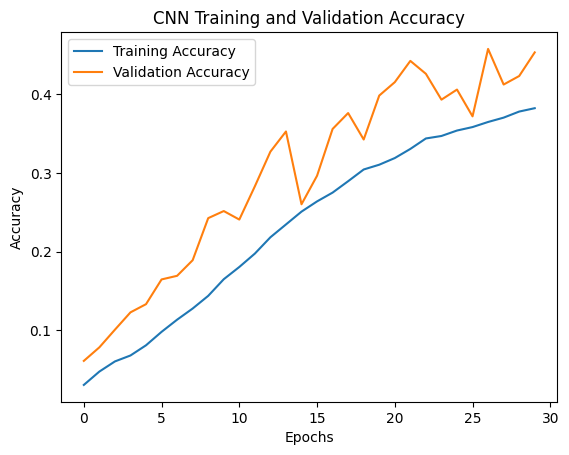

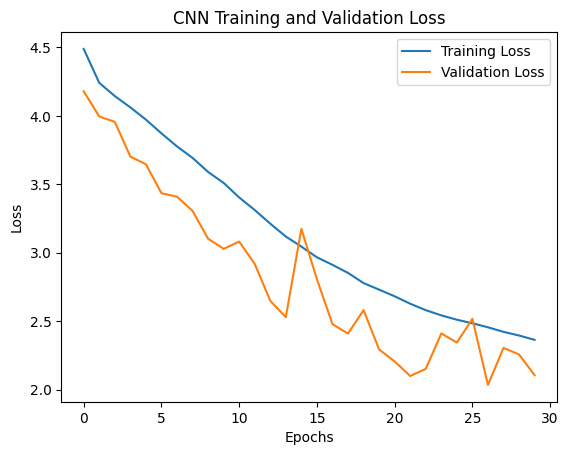

In [10]:
# Convert labels to one-hot encoding for CNN
y_train_onehot = to_categorical(y_train, 100)
y_test_onehot = to_categorical(y_test, 100)

# Split training data into training and validation sets manually (90% train, 10% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train_onehot, test_size=0.1, random_state=42
)

# Data Augmentation for CNN
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train_split)

# Improved CNN Model
cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

cnn.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn.fit(datagen.flow(x_train_split, y_train_split, batch_size=64),
                      epochs=30,
                      validation_data=(x_val_split, y_val_split))

# Evaluate the CNN Model
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test, y_test_onehot)
print(f"CNN Test Accuracy: {cnn_test_accuracy}")

# Plot CNN training & validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot CNN training & validation loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Compare results of Logistic Regression, LR with PCA and CNN
print("Results Summary:")
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")
print(f"Logistic Regression with PCA Test Accuracy: {lr_pca_accuracy}")
print(f"CNN Test Accuracy: {cnn_test_accuracy}")

Results Summary:
Logistic Regression Test Accuracy: 0.1798
Logistic Regression with PCA Test Accuracy: 0.1866
CNN Test Accuracy: 0.4512999951839447


In [12]:
# Save the trained model for reuse
cnn.save('cifar100_cnn_model_improved.h5')

# Load the model (if needed)
from tensorflow.keras.models import load_model
model = load_model('cifar100_cnn_model_improved.h5')


In [13]:
# CIFAR-100 class names (for demonstration, you need to load all 100 names)
from keras.datasets import cifar100
(_, _), (_, y_test) = cifar100.load_data(label_mode='fine')
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
                'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
                'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
                'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
                'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
                'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
                'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
                'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


In [14]:
from PIL import Image
import numpy as np

def process_image(image_path):
    # Load the image
    img = Image.open(image_path).resize((32, 32))
    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0
    # Expand dimensions to match model input
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [15]:
def predict_class(image_path):
    # Process the image
    img_array = process_image(image_path)
    # Predict using the model
    predictions = model.predict(img_array)
    # Get the class index
    predicted_class = np.argmax(predictions[0])
    # Map the class index to the class name
    class_name = class_labels[predicted_class]
    return class_name


In [16]:
with open('predict_image.py', 'w') as f:
    f.write("""
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Load the trained model
model = load_model('cifar100_cnn_model.h5')

# CIFAR-100 class names
class_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
                'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
                'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
                'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
                'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
                'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
                'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
                'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Function to process the input image
def process_image(image_path):
    \"\"\"
    Preprocesses the input image to make it compatible with the trained model.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        np.array: Preprocessed image array ready for prediction.
    \"\"\"
    img = Image.open(image_path).resize((32, 32))  # Resize to 32x32
    img_array = np.array(img) / 255.0             # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    return img_array

# Function to predict the class of an image
def predict_class(image_path):
    \"\"\"
    Predicts the class of the given image using the trained model.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        str: Predicted class label.
    \"\"\"
    # Process the image
    img_array = process_image(image_path)
    # Make predictions
    predictions = model.predict(img_array)
    # Get the index of the highest probability
    predicted_class = np.argmax(predictions[0])
    # Map the class index to the class label
    class_name = class_labels[predicted_class]
    return class_name

# Main function to demonstrate prediction
if __name__ == '__main__':
    # Replace 'path/to/your/image.jpg' with the actual path to your test image
    image_path = 'path/to/your/image.jpg'

    # Get the predicted class
    predicted_label = predict_class(image_path)
    print(f"The predicted class is: {predicted_label}")
    """)




In [18]:
from google.colab import files
uploaded = files.upload()

# Predict the class for the uploaded image
for image_path in uploaded.keys():
    predicted_label = predict_class(image_path)
    print(f"The predicted class for {image_path} is: {predicted_label}")



Saving airplane-flying-1567519341Qaz.jpg to airplane-flying-1567519341Qaz.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class for airplane-flying-1567519341Qaz.jpg is: whale
